# NLP Pre-Processing & Word Embedding

In [1]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BharviC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BharviC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BharviC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

txt = pd.read_csv("SMSSpamCollection.txt", sep='\t', names = ["label","messages"])
txt = pd.DataFrame(txt)

In [3]:
txt.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
txt.shape

(5572, 2)

<Axes: xlabel='label'>

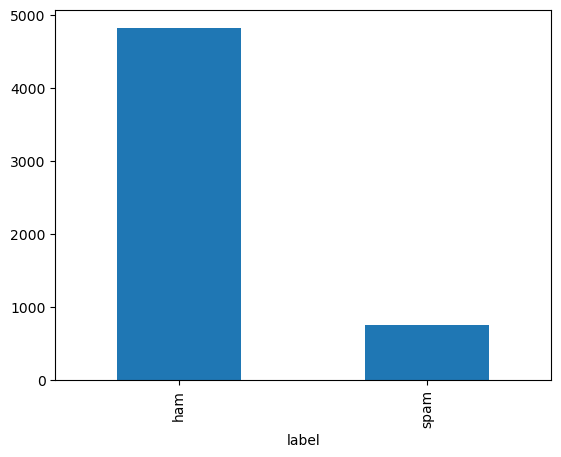

In [5]:
# check target balance
txt['label'].value_counts().plot.bar()

In [6]:
txt.isnull().sum()

label       0
messages    0
dtype: int64

In [7]:
txt['length'] = txt['messages'].apply(lambda x: len(x))
txt.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Text Pre-Processing

In [8]:
#Importing libraries
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BharviC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #Used for stemming purpose

### Removing Stopwords using stemming

In [10]:
#corpus = []
#for i in range (0,len(txt)):
#    review= re.sub('[^a-zA-Z0-9]', ' ', txt['messages'][i])
#    review = review.lower()
#    review = review.split()
#    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#    review = ' '.join(review)
#    corpus.append(review)

# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [11]:
txt['messages'] = txt['messages'].apply(lambda x: convert_to_lower(x))
txt['messages'] = txt['messages'].apply(lambda x: remove_numbers(x))
txt['messages'] = txt['messages'].apply(lambda x: remove_punctuation(x))
txt['messages'] = txt['messages'].apply(lambda x: remove_stopwords(x))
txt['messages'] = txt['messages'].apply(lambda x: remove_extra_white_spaces(x))
txt['messages'] = txt['messages'].apply(lambda x: lemmatizing(x))

In [12]:
txt['length_after_cleaning'] = txt['messages'].apply(lambda x: len(x))
txt.head()

,label,messages,length,length_after_cleaning
0,ham,go jurong point crazy available bugis great wo...,111,78
1,ham,ok lar joking wif oni,29,21
2,spam,free entry wkly comp win fa cup final tkts st ...,155,101
3,ham,u dun say early hor c already say,49,33
4,ham,nah dont think go usf life around though,61,40


In [13]:
# converting string labels to int labels

label_map = {
    'ham': 0,
    'spam': 1,
}

txt['label'] = txt['label'].map(label_map)
txt.head()

,label,messages,length,length_after_cleaning
0,0,go jurong point crazy available bugis great wo...,111,78
1,0,ok lar joking wif oni,29,21
2,1,free entry wkly comp win fa cup final tkts st ...,155,101
3,0,u dun say early hor c already say,49,33
4,0,nah dont think go usf life around though,61,40


## Bag of Words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500,binary = True)
# max_feature = take top 2500 max occuring features
X_cv = cv.fit_transform(txt['messages']).toarray()


In [15]:
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_cv.shape

(5572, 2500)

In [17]:
cv_ng = CountVectorizer(max_features = 2500,binary = True, ngram_range = (2,2))
# Binary = T -> if a word is present more than once, the text will be positive only
# max_feature = take top 2500 max occuring features
X_ng = cv_ng.fit_transform(txt['messages']).toarray()

In [18]:
X_ng

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
#Train test Split
# Create Feature and Label sets

X = txt['messages']
y = txt['label']

# train test split (80% train - 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.20, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (4457, 2500)
Testing Data :  (1115, 2500)


In [20]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_NB1 = MultinomialNB().fit(X_train, y_train)

In [21]:
#prediction
y_pred=spam_detect_NB1.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report

In [23]:
scoreNB1=accuracy_score(y_test,y_pred)
print(scoreNB1)

0.9811659192825112


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       967
           1       0.92      0.95      0.93       148

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## TF-IDF model

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 2500,ngram_range = (1,2))
X = tv.fit_transform(txt['messages']).toarray()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (4457, 2500)
Testing Data :  (1115, 2500)


### Naive Bayes Text Classifier

In [31]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [32]:
#prediction
y_pred=spam_detect_model.predict(X_test)

In [33]:
score=accuracy_score(y_test,y_pred)
print(score)

0.9766816143497757


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       988
           1       0.83      1.00      0.91       127

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



For Naive Bayes, BOW is giving better results than IF-IDF.             
How????????

### Random Forest Classifier using TF-IDF

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9739910313901345
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       983
           1       0.84      0.97      0.90       132

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.98      0.97      0.97      1115



### Random Forest Classifier using BOW

X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.20, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

In [40]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.97847533632287
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       982
           1       0.86      0.98      0.92       133

    accuracy                           0.98      1115
   macro avg       0.93      0.98      0.95      1115
weighted avg       0.98      0.98      0.98      1115



For RF also, BOW is giving better results than IF-IDF.             
How????????

## Word2Vec 

In [48]:
!pip install gensim

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   -------------------- ------------------- 30.7/59.6 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 59.6/59.6 kB 783.1 kB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20451 sha256=d3655f1d2a44601d1a85b131edf2cc1d8661682697654b2131e58163444211d4
  Stored in directory: c:\users\bharvic\appdata\local\pip\cache\wheels\69\f5\e5\18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3517 sha256=1f631b1861cb41a551116b25b8e7a044ffe1b1a089ffa2800915be80995e986b
  Stored in directory: c:\users\bharvic\appdata\local\pip\cache\wheels\9d\ff\2f\afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
S

In [ ]:
vec_King = wv['king']

In [ ]:
vec_king

### Remoing Stopwords using Lemmetization

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [48]:
corpus = []
for i in range(0, len(txt)):
    review = re.sub('[^a-zA-Z]', ' ', txt['messages'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [45]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

### Tokenisation

In [49]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [50]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  

In [52]:
import gensim

In [53]:
#Let's train Workd2Vec from stractch
model = gensim.models.Word2Vec(words,window = 5, min_count = 2)
#Default dim = vector_size = 100, 
#min_count = ignores all words with total frequency lower than this


In [56]:
model

In [55]:
model.corpus_count

5566

In [57]:
model.epochs

5

In [59]:
model.wv.similar_by_word('happy')

[('year', 0.9993911385536194),
 ('day', 0.9993244409561157),
 ('new', 0.9992977380752563),
 ('wish', 0.9992515444755554),
 ('hope', 0.9992328882217407),
 ('many', 0.9992233514785767),
 ('went', 0.9992181658744812),
 ('said', 0.9991850852966309),
 ('amp', 0.9991751313209534),
 ('special', 0.9991742372512817)]

In [61]:
model.wv['happy'].shape

(100,)

### Average Word2Vec

In [62]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)
        

In [63]:
#!pip install tqdm

In [65]:
from tqdm import tqdm

In [66]:
X=[]
for i in tqdm(range(len(words))):
    #print("Hello",i)
    X.append(avg_word2vec(words[i]))


  0%|                                                                                         | 0/5566 [00:00<?, ?it/s]C:\Users\BharviC\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\BharviC\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████| 5566/5566 [00:00<00:00, 9465.36it/s]


In [68]:
type(X)

list

In [69]:
X

[array([-2.11753294e-01,  2.68279105e-01,  1.30027235e-01,  2.60332953e-02,
         3.62135172e-02, -4.12811160e-01,  1.03573330e-01,  4.67611223e-01,
        -2.25773811e-01, -1.40988812e-01, -1.65954545e-01, -3.24307710e-01,
        -6.85692728e-02,  7.49938488e-02,  2.45129486e-04, -2.10193977e-01,
         7.21443370e-02, -3.02631468e-01, -1.28766587e-02, -4.46387768e-01,
         1.67947590e-01,  8.63566026e-02,  1.89390346e-01, -1.22014761e-01,
        -6.23226762e-02,  1.00279130e-01, -2.37781331e-01, -1.99231088e-01,
        -1.55516878e-01,  5.05844243e-02,  2.51933575e-01,  8.71177614e-02,
         7.71557763e-02, -1.43003181e-01, -7.67901540e-02,  3.14196855e-01,
         6.41619787e-03, -1.77607730e-01, -1.56829759e-01, -4.82290655e-01,
         8.30732211e-02, -2.27930829e-01, -5.13475528e-03,  6.34749234e-03,
         1.95925593e-01, -8.34660903e-02, -2.38372788e-01, -6.22648560e-02,
         1.60738066e-01,  1.01197302e-01,  1.46983996e-01, -2.13368073e-01,
        -8.7

In [80]:
len(X)

5566

In [67]:
#X_new = np.array(X)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5566,) + inhomogeneous part.

In [70]:
X[3]

array([-0.27643347,  0.34692025,  0.16565593,  0.03424116,  0.04013148,
       -0.53113747,  0.13097303,  0.60697156, -0.28678462, -0.17975377,
       -0.22080775, -0.419139  , -0.09480137,  0.10137858,  0.00147488,
       -0.2706062 ,  0.09314871, -0.39513388, -0.01863607, -0.57219636,
        0.215246  ,  0.11702017,  0.24257778, -0.16050744, -0.0774776 ,
        0.12598212, -0.3095963 , -0.26009855, -0.1907476 ,  0.06523519,
        0.32561722,  0.11286184,  0.09559655, -0.1823001 , -0.1006989 ,
        0.40867126,  0.0042298 , -0.23251088, -0.20147526, -0.6183364 ,
        0.10665429, -0.29245132, -0.01006206,  0.00351473,  0.25441256,
       -0.10628244, -0.31324342, -0.08360877,  0.20939682,  0.1346702 ,
        0.19329964, -0.27409434, -0.11475221, -0.0147141 , -0.1869107 ,
        0.21518004,  0.12482765, -0.01843634, -0.43092963,  0.10019419,
        0.09707659,  0.14882076, -0.08644276, -0.04037613, -0.34536102,
        0.18626876,  0.2196762 ,  0.26964745, -0.41878018,  0.39

In [74]:
words[5]

['freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv']

In [75]:
X[5]

array([-0.2379242 ,  0.29981   ,  0.14614147,  0.02581893,  0.03863073,
       -0.4660944 ,  0.1153703 ,  0.52487653, -0.25360256, -0.16101874,
       -0.18453948, -0.3688005 , -0.07696945,  0.08840355,  0.00174955,
       -0.23743807,  0.08491357, -0.3420833 , -0.01437542, -0.50235033,
        0.1901578 ,  0.09697609,  0.21006484, -0.13330193, -0.0670988 ,
        0.11378995, -0.26849034, -0.22631218, -0.17213467,  0.05608435,
        0.28652543,  0.0958886 ,  0.09064571, -0.16173938, -0.08740577,
        0.36080474,  0.00690189, -0.20094392, -0.17470062, -0.5401412 ,
        0.08930229, -0.25729138, -0.00576618,  0.00605107,  0.22308049,
       -0.09318229, -0.27315766, -0.07378978,  0.18305576,  0.11493716,
        0.1673256 , -0.24130398, -0.10146203, -0.01060999, -0.164665  ,
        0.18897499,  0.10673312, -0.0133996 , -0.38531008,  0.08676767,
        0.08479928,  0.12868279, -0.07634262, -0.02835435, -0.30211067,
        0.16830908,  0.19435865,  0.22921778, -0.36532843,  0.34

## Random Forest using Avg Word2Vec

In [78]:
len(X)

5566

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [5566, 5572]

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))